In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
import seaborn as sns
import seaborn.objects as so

In [47]:
#HYPOTHESIS

#1) Misha
    #Do hybrid types have more happy effects compared to non-hybrid types?
        #Option 1: Create data frame from first 5 columns, then call columns needed to compare type with effect

    #Option 2: Group data by type and effect

    #Visual display of how many happy effects associated to each type - Donut Charts (3 total)
    
    #What is the correlation of type to effect-Use P-Values - Scatter Plot
        #Make sure to add statement - If P value is greater than x-value (look for this) there is a strong correlation

#2) Kim
    #Does sweet profile cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating
    
#3) #Latti
    #Does the location of the breeder impact the rating? Does the location impact the type that is grown?


#4)  Tacha
    #Is there a significant difference in the effects experienced by consumers when they rate the same cannabis type differently? 
    #(Use data to get the ratings of the cannabis type and analyze the effects reported to see if they are consistent.) Do users feel different effects when they use the same type of cannabis(yes). How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.


In [48]:
Original_Data = pd.read_csv("new_cannabis_data.csv",encoding ='latin-1')
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN


In [49]:
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2346,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [50]:
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head()

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN


In [51]:
flavors = Original_Data.Flavor.str.split(",",expand=True)
flavors.columns=["flavor_1", "flavor_2", "flavor_3", "flavor_4"]
flavors.head()

,flavor_1,flavor_2,flavor_3,flavor_4
0,Spicy_Herbal,Sage,Woody,None
1,Earthy,Sweet,Citrus,None
2,Apricot,Citrus,Grapefruit,None
3,Citrus,Earthy,Orange,None
4,NaN,NaN,NaN,NaN


In [52]:
flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flavor_1  2195 non-null   object
 1   flavor_2  2161 non-null   object
 2   flavor_3  2117 non-null   object
 3   flavor_4  43 non-null     object
dtypes: object(4)
memory usage: 73.6+ KB


In [53]:
pd.concat([Original_Data, effects, flavors], axis=1)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy_Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",A Greener Today's Dankczar,NaN,Happy,Uplifted,Relaxed,Euphoric,Energetic,Earthy,Woody,Pine,None
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",3rd Gen Family and Terp Hogz,NaN,Relaxed,Happy,Euphoric,Uplifted,Sleepy,Sweet,Berry,Grape,None
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy_Herbal",Ripper Seeds,NaN,Relaxed,Sleepy,Talkative,Euphoric,Happy,Earthy,Sweet,Spicy_Herbal,None
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",NaN,NaN,Relaxed,Sleepy,Euphoric,Happy,Hungry,Sweet,Earthy,Pungent,None


In [54]:
#Clean original data and combined data frame of the flavors and effects into the original Data Frame
OD2=pd.concat([Original_Data, effects, flavors], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy_Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2["num_flavors"]=OD2.Flavor.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Breeders     1165 non-null   object 
 6   LOCATION     614 non-null    object 
 7   effect_1     2264 non-null   object 
 8   effect_2     2254 non-null   object 
 9   effect_3     2239 non-null   object 
 10  effect_4     2212 non-null   object 
 11  effect_5     2180 non-null   object 
 12  flavor_1     2195 non-null   object 
 13  flavor_2     2161 non-null   object 
 14  flavor_3     2117 non-null   object 
 15  flavor_4     43 non-null     object 
 16  num_effects  2264 non-null   float64
 17  num_flavors  2195 non-null   float64
dtypes: float64(3), object(15)
memory usage: 330.7+ K

In [56]:
OD2["effect_1"].value_counts()

effect_1
Relaxed      825
Happy        476
Euphoric     249
Uplifted     244
Sleepy        89
Creative      80
Energetic     74
Talkative     55
Focused       53
Aroused       38
Hungry        36
Tingly        32
Giggly        12
Dry            1
Name: count, dtype: int64

In [57]:
#Remove null values - Flavor4
OD2=OD2.drop(columns=["flavor_4"])
OD3=OD2.dropna(how="any")
OD3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 2341
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       501 non-null    object 
 1   Type         501 non-null    object 
 2   Rating       501 non-null    float64
 3   Effects      501 non-null    object 
 4   Flavor       501 non-null    object 
 5   Breeders     501 non-null    object 
 6   LOCATION     501 non-null    object 
 7   effect_1     501 non-null    object 
 8   effect_2     501 non-null    object 
 9   effect_3     501 non-null    object 
 10  effect_4     501 non-null    object 
 11  effect_5     501 non-null    object 
 12  flavor_1     501 non-null    object 
 13  flavor_2     501 non-null    object 
 14  flavor_3     501 non-null    object 
 15  num_effects  501 non-null    float64
 16  num_flavors  501 non-null    float64
dtypes: float64(3), object(14)
memory usage: 70.5+ KB


In [58]:
#We droped 12% of null values so 88% of our data is valid
#(2351-2053)/2351

In [59]:
#fIND TOTAL VALUES FOR EACH TYPE
OD3.Type.value_counts()

Type
hybrid    236
indica    157
sativa    108
Name: count, dtype: int64

In [60]:
#Find average rating for each
OD3.groupby("Type").Rating.mean()

Type
hybrid    4.398305
indica    4.455414
sativa    4.435185
Name: Rating, dtype: float64

In [61]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
OD3.groupby(["Type", "effect_1"]).size()

Type    effect_1 
hybrid  Aroused        4
        Creative       6
        Energetic      4
        Euphoric      34
        Focused        7
        Happy         63
        Hungry         2
        Relaxed       74
        Sleepy         2
        Talkative      7
        Tingly         4
        Uplifted      29
indica  Aroused        2
        Creative       2
        Euphoric      15
        Focused        1
        Giggly         1
        Happy          8
        Hungry         1
        Relaxed      112
        Sleepy        10
        Talkative      1
        Uplifted       4
sativa  Aroused        3
        Creative       5
        Energetic      6
        Euphoric      21
        Focused        4
        Giggly         1
        Happy         31
        Hungry         1
        Relaxed        9
        Sleepy         1
        Talkative      2
        Uplifted      24
dtype: int64

In [62]:
#COUNT FOR EACH EFFECT FOR EFFECT2 BY TYPE
#OD3.groupby(["Type", "effect_2"]).size()

In [63]:
#COUNT FOR EACH EFFECT FOR EFFECT3 BY TYPE
#OD3.groupby(["Type", "effect_3"]).size()

In [64]:
#COUNT FOR EACH EFFECT FOR EFFECT4 BY TYPE
#OD3.groupby(["Type", "effect_4"]).size()

In [65]:
#COUNT FOR EACH EFFECT FOR EFFECT5 BY TYPE
#OD3.groupby(["Type", "effect_5"]).size()

In [78]:
#4)  Tacha
    #Is there a significant difference by grouped effects experienced by consumers when they rate the same cannabis type differently? 
    
    #(Use data to get the ratings of the cannabis type and analyze the effects reported to see if they are consistent.)
    
    #Do users feel different effects when they use the same type of cannabis(yes). 
    
    #How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. 
    
    #What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.
    #Happiness

In [79]:
#Hybrid dataframe Robbins
#Pull Hybrid Type from DF
hybrid_df = OD3.groupby(["Type", "effect_1", "Rating"]).size()
hybrid_2_df=pd.DataFrame(hybrid_df)
hybrid_2_df.head()

0
Type   effect_1 Rating   
hybrid Aroused  4.8     1
                5.0     3
       Creative 4.0     1
                4.5     1
                4.6     2

In [80]:
final=hybrid_2_df.loc["hybrid"]
final.head(20)


0
effect_1  Rating   
Aroused   4.8     1
          5.0     3
Creative  4.0     1
          4.5     1
          4.6     2
          4.7     1
          4.9     1
Energetic 3.9     1
          4.1     1
          4.5     1
          5.0     1
Euphoric  3.8     1
          4.0     4
          4.1     2
          4.2     3
          4.3     5
          4.4     5
          4.5     1
          4.6     5
          4.7     1

In [81]:
final=hybrid_2_df.loc["indica"]
final.head(20)


0
effect_1 Rating   
Aroused  3.7     1
         5.0     1
Creative 4.2     1
         5.0     1
Euphoric 3.7     2
         4.2     2
         4.3     1
         4.4     4
         4.5     1
         4.6     1
         4.7     2
         4.8     1
         5.0     1
Focused  5.0     1
Giggly   4.0     1
Happy    3.9     1
         4.3     1
         4.5     1
         4.6     1
         4.8     2

In [82]:
final=hybrid_2_df.loc["sativa"]
final.head(20)


0
effect_1  Rating   
Aroused   4.4     1
          4.7     1
          5.0     1
Creative  4.2     1
          4.5     2
          4.6     2
Energetic 4.1     2
          4.2     1
          4.5     1
          4.6     2
Euphoric  3.8     1
          3.9     1
          4.0     1
          4.2     2
          4.3     2
          4.4     4
          4.5     2
          4.6     1
          4.7     1
          4.8     4

In [83]:
#Does the “Effect” show the significant difference experienced by consumers while “Rating” the same cannabis type differently? 
#Place all “Type” of Cannabis in a Table(columns) with all five(5) effects to review the “Rating” for each
cols=["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]
OD3[cols].head()


,Type,effect_1,effect_2,effect_3,effect_4,effect_5,Rating
0,sativa,Uplifted,Happy,Relaxed,Energetic,Creative,4.4
2,hybrid,Tingly,Creative,Hungry,Relaxed,Uplifted,4.2
10,hybrid,Relaxed,Euphoric,Sleepy,Happy,Talkative,4.5
11,indica,Relaxed,Focused,Euphoric,Uplifted,Aroused,4.4
13,indica,Relaxed,Uplifted,Happy,Creative,Euphoric,4.3


In [92]:
#Same command as above but pull with: .size()
OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]).min()


Strain  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                       
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0           Silver-Calyx   
                Euphoric  Focused   Happy     Hungry    5.0                 Chicle   
                Tingly    Uplifted  Euphoric  Focused   4.8          Savants-Grail   
                Uplifted  Energetic Sleepy    Tingly    5.0          Peles-Fire-Og   
       Creative Energetic Happy     Aroused   Uplifted  4.9          Morning-Glory   
...                                                                            ...   
sativa Uplifted Happy     Relaxed   Talkative Energetic 4.6             Royal-Haze   
                          Talkative Energetic Euphoric  5.0         Sour-Star-Head   
                Relaxed   Energetic Euphoric  Focused   4.4     Sequoia-Strawberry   
                                    Happy     Focused   4.3              Hurricane   
                          Happy     Euphoric  Focused   4.6       Chocolate-Fondue   

                                                                                                    Effects  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                                                
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0      Aroused,Energetic,Euphoric,Focused,Relaxed   
                Euphoric  Focused   Happy     Hungry    5.0           Aroused,Euphoric,Focused,Happy,Hungry   
                Tingly    Uplifted  Euphoric  Focused   4.8        Aroused,Tingly,Uplifted,Euphoric,Focused   
                Uplifted  Energetic Sleepy    Tingly    5.0        Aroused,Uplifted,Energetic,Sleepy,Tingly   
       Creative Energetic Happy     Aroused   Uplifted  4.9       Creative,Energetic,Happy,Aroused,Uplifted   
...                                                                                                     ...   
sativa Uplifted Happy     Relaxed   Talkative Energetic 4.6      Uplifted,Happy,Relaxed,Talkative,Energetic   
                          Talkative Energetic Euphoric  5.0     Uplifted,Happy,Talkative,Energetic,Euphoric   
                Relaxed   Energetic Euphoric  Focused   4.4     Uplifted,Relaxed,Energetic,Euphoric,Focused   
                                    Happy     Focused   4.3        Uplifted,Relaxed,Energetic,Happy,Focused   
                          Happy     Euphoric  Focused   4.6         Uplifted,Relaxed,Happy,Euphoric,Focused   

                                                                                   Flavor  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                              
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0         Lemon,Tree,Fruit,Pine   
                Euphoric  Focused   Happy     Hungry    5.0           Ammonia,Diesel,Mint   
                Tingly    Uplifted  Euphoric  Focused   4.8          Sweet,Flowery,Earthy   
                Uplifted  Energetic Sleepy    Tingly    5.0         Diesel,Earthy,Pungent   
       Creative Energetic Happy     Aroused   Uplifted  4.9            Citrus,Pepper,Lime   
...                                                                                   ...   
sativa Uplifted Happy     Relaxed   Talkative Energetic 4.6         Citrus,Tropical,Skunk   
                          Talkative Energetic Euphoric  5.0     Citrus,Sweet,Spicy_Herbal   
                Relaxed   Energetic Euphoric  Focused   4.4         Strawberry,Sweet,Pine   
                                    Happy     Focused   4.3      Spicy_Herbal,Grape,Berry   
                          Happy     Euphoric  Focused   4.6           Sweet,Cheese,Earthy   

                                                                                                Breeders  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                                             
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0                            

In [98]:
#How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. 
#What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.
#Request the “Rating” of each ‘Effect” by the min to find the Significant Difference by “Rating” of “Effect”
per_all_effect_rating = OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
per_all_effect_rating = per_all_effect_rating["Rating"].max()
per_all_effect_rating


Type    effect_1  effect_2   effect_3   effect_4   effect_5 
hybrid  Aroused   Energetic  Euphoric   Focused    Relaxed      5.0
                  Euphoric   Focused    Happy      Hungry       5.0
                  Tingly     Uplifted   Euphoric   Focused      4.8
                  Uplifted   Energetic  Sleepy     Tingly       5.0
        Creative  Energetic  Happy      Aroused    Uplifted     4.9
                                                               ... 
sativa  Uplifted  Happy      Relaxed    Talkative  Energetic    4.6
                             Talkative  Energetic  Euphoric     5.0
                  Relaxed    Energetic  Euphoric   Focused      4.4
                                        Happy      Focused      4.3
                             Happy      Euphoric   Focused      4.6
Name: Rating, Length: 460, dtype: float64

In [96]:
#Request the Average “Rating” of each ‘Effect” by the mean to find the Significant Difference by “Rating” of “Effect”
per_all_effect_rating = OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
per_all_effect_rating = per_all_effect_rating["Rating"].size()
per_all_effect_rating


Type    effect_1  effect_2   effect_3   effect_4   effect_5 
hybrid  Aroused   Energetic  Euphoric   Focused    Relaxed      1
                  Euphoric   Focused    Happy      Hungry       1
                  Tingly     Uplifted   Euphoric   Focused      1
                  Uplifted   Energetic  Sleepy     Tingly       1
        Creative  Energetic  Happy      Aroused    Uplifted     1
                                                               ..
sativa  Uplifted  Happy      Relaxed    Talkative  Energetic    1
                             Talkative  Energetic  Euphoric     1
                  Relaxed    Energetic  Euphoric   Focused      1
                                        Happy      Focused      1
                             Happy      Euphoric   Focused      1
Name: Rating, Length: 460, dtype: int64

AttributeError: Text.set() got an unexpected keyword argument 'rotations'

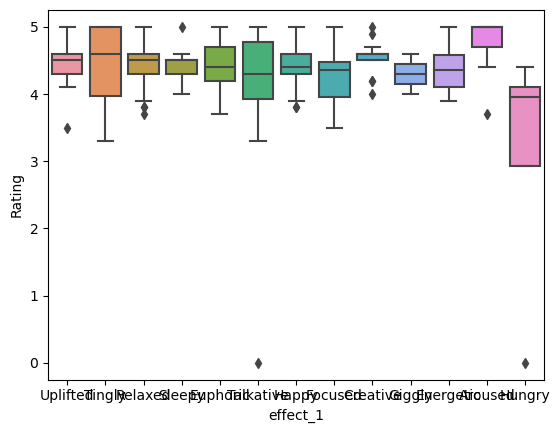

In [97]:
#Create a Box plot to see if Ratings vary depending on the effect (Using effect_1)
box_plot_e1=sns.boxplot(data=OD3, x="effect_1", y="Rating")
box_plot_e1.set_xticklabels(box_plot_e1.get_xticklabels(), rotations=40,ha="right")
plt.tight_layout()

plt.show()

In [ ]:
#df3.to_csv("MaryJane_clean_data.csv", index=False)

In [ ]:
#plt.scatter(-------['Type'],----------['Rating'])
color_bar = plt.colorbar()
color_bar.set_label('effect_1')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

In [ ]:
#Plot 
plt.hist(hybrid_2_df["Rating"])
plt.xlabel("effect_1")
plt.ylabel("Type")
plt.show()